<a href="https://colab.research.google.com/github/Khushbushahh/Data-Wrangling-and-Visualization/blob/main/First_Github_Report_Data_Wrangling_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction and About the Data Set**: 

The data set is gene expression in multiple samples of breast and liver cancer tissues inlcuding both tumor and nontumor. The genes in the data set were obtained from The Cancer Genome Atlas Program which has over 20,000 cancer samples of 33 different cancer types. This data set allows us to look at various samples across a wide range of tissue types. 

With this data set we want to explore 2 different genes associated with breast and liver cancer to identify their levels of expression. Specifically, I will focus on BARD1 for breast cancer and CTNNB1 for liver cancer. I will load the data and necessary libraries and then continue with visual representation of the data. Visual representation is helpful to interpret that data across various samples. Furthermore, I will continue with T-tests that will provide p-values for the chosen genes, allowing us to understand the statistical signifiance of the gene expression. Through these data wrangling and visualization techniques along with supporting literature, we should be able to further evaluate the significance of each gene and its expression. The question I would like to ask is if there is an overlap between the genes and their expression in other cancers? In conclusion, based on the bar graphs and T-tests there is significant expression of BRAD1 in breast cancer and CTNNB1 in liver cancer. An interesting point I came across is that CTNNB1 gene expression could be significant in breast cancer as after running the code for gene expression among the BRCA samples, the p-value for LIHC was greater. 


### **Importing Data**: Question 1

In this first step, we are loading the dataset so that we can obtain the expression values of both breast and liver cancer. By doing so this will allow us to interpret the data and compare the expression values of the genes. 

In [1]:
!pip install researchpy --q

In [8]:
#importing all necessary libraries 
import pandas as pd
import numpy as np 
import scipy as scipy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [9]:
#loading the data set and correctly formatting columns and rows so that the data can be manipulated 
GeneExpression = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt')
GeneExpression.index=GeneExpression['Id']
GeneExpression = GeneExpression.drop(['Id'], axis =1)
GeneExpression = GeneExpression.drop(['class'], axis =0)
GeneExpression

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764
a10431,1561,1297,1423,1454,1125,2128,408.076,1360.8341,865.5358,978.4127,970.7569,770.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX|7791,4869,10756,3708,2799,1661,4915,3507.2482,5458.7489,5691.3529,6455.873,6038.9281,2344.7047
ZZEF1|23140,1366,1533,1606,493,320,638,1894.9342,942.883,781.1336,1314.2857,1477.386,1997.9633
ZZZ3|26009,783,1746,412,486,694,482,1180.4565,509.5195,700.8688,968.254,620.9685,730.6517


### **Exploring the Data Set: Question 2, 3, & 4**

Evaluating the expression of breast and liver cancer genes using the .loc function and visually analzying the data using the bar plot. 

In [10]:
#converting the dataset to a float type so it can be graphed
GeneExpression = GeneExpression.astype(float)
GeneExpression.loc['BARD1|580']

TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP      6.0000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    136.0000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP     10.0000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT      7.0000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT      5.0000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT      5.0000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    139.5868
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP     31.7316
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    147.2900
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT     64.7619
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT     32.3460
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT     21.8941
Name: BARD1|580, dtype: float64

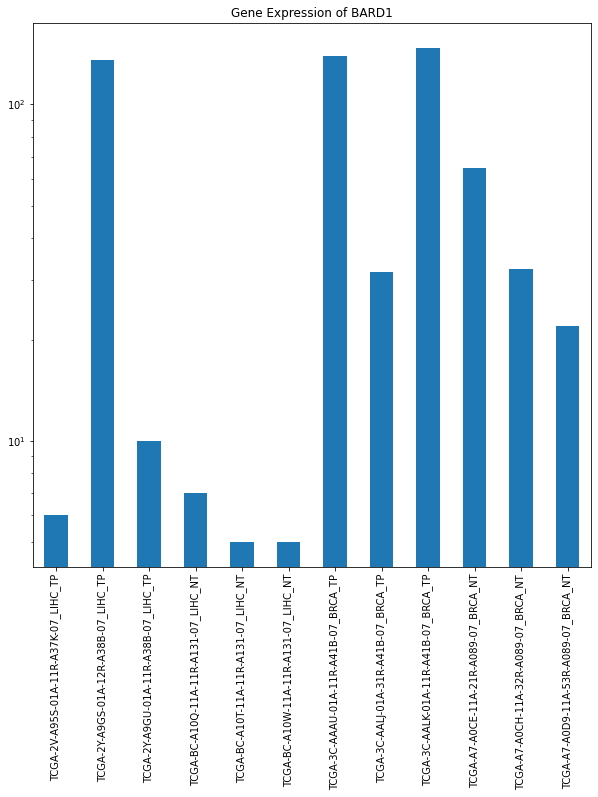

In [12]:
#transposing the dataset to be able to plot the data
GeneExpressionTranspose = GeneExpression.transpose()
#plotting the data
GeneExpressionTranspose['BARD1|580'].plot.bar(rot=90, figsize = (10,10), logy = True, title = 'Gene Expression of BARD1')

BARD1 also goes by the protein name BRCA1-associated RING domain protein 1. It is 777 amino acids long and found on chromosome 2. 

BARD1 is a breast cancer gene known to have a low to moderate risk. Further research is requried for more information on this specific gene and its association with breast cancer. However, a specific case study was done for a reoccuring nonsense mutations to show that "the association of a deleterious BARD1 mutation with BC as a low/moderate risk allele." Additionally, in association with the BRCA1 gene BARD1 is said to act as a tumor surpressor in the pathway.


As per the graph depicted above, we can see that tissue type is more significant in expression of the samples. Expression is greatest in breast cancer genes regardless of tumor type. However, it is interesting to see that there one liver cancer sample that is highly expressed, similar to that of the breast cancer samples. 


References: 

Suszynska, Malwina et al. “BARD1 is A Low/Moderate Breast Cancer Risk Gene: Evidence Based on An Association Study of the Central European p.Q564X Recurrent Mutation.” Cancers vol. 11,6 740. 28 May. 2019, doi:10.3390/cancers11060740

“Uniprot Database.” UniProt, https://www.uniprot.org/uniprotkb/Q99728/entry#disease_variants. 



In [25]:
#looking at expression of data
GeneExpression.loc['CTNNB1|1499']

TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP     5728.0000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    17462.9100
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP     8301.9900
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT     6286.9900
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT     5552.9900
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT     4951.9900
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP     5729.4738
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP     5766.9628
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP     7452.9541
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    14328.1587
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT     8579.9116
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT     6671.0234
Name: CTNNB1|1499, dtype: float64

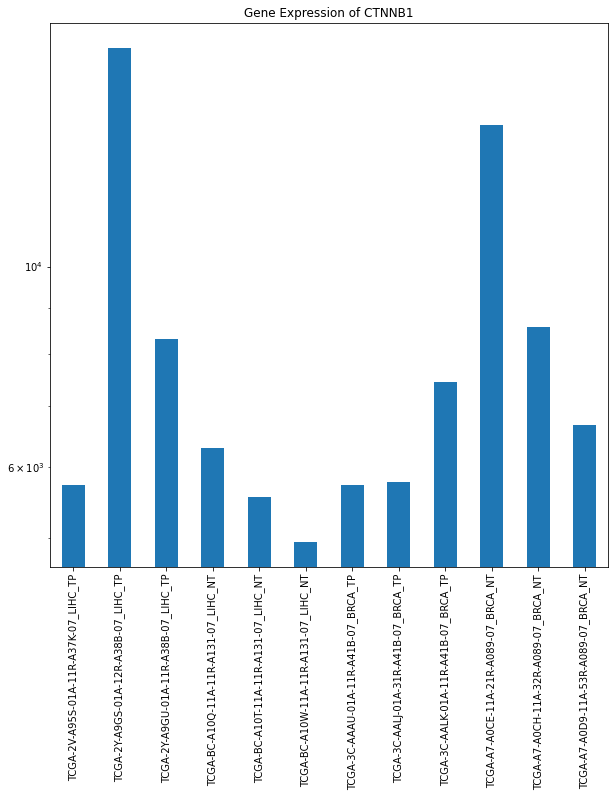

In [26]:
#looking at expression of data visually using a graph
GeneExpressionTranspose['CTNNB1|1499'].plot.bar(rot=90, figsize = (10,10), logy = True, title = 'Gene Expression of CTNNB1')

CTNNB1 also goes by the protein name Catenin beta-1. It is 781 amino acids long and found on chromosome 3. It is also involved with a few other diseases/cancers however its main significance is in HCC (Hepatocellular carcinoma). HCC is known to have very few therapuetic options and the Wnt/beta-cetenin pathway plays a important role in its pathogenesis. The Wnt/beta-catenin pathway is a complex pathway in which cell proliferation is continuous thus its prominence in HCC and cancer cells.

As per the graph above, tumor type is significant to expression of the samples as we can see that the liver cancer sample for TP is greater compared to liver samples that are NT. Also, it is intersting to note that there is not much similarity across all the liver cancer samples. Additionally, its important to note that one of the breast cancer NT samples has an expression almost equal to that of a liver cancer TP sample.

References: 
Ding, Zhihu et al. “Oncogenic dependency on β-catenin in liver cancer cell lines correlates with pathway activation.” Oncotarget vol. 8,70 114526-114539. 28 Sep. 2017, doi:10.18632/oncotarget.21298

“Uniprot Database.” UniProt, https://www.uniprot.org/uniprotkb/P35222/entry#disease_variants. 


### **Measure of Significance : Question 5**

In this step, I reloaded the data set have a clear notebook and avoid any issues with the graph from the previous step.


In [16]:
#reloading the dataset
GeneExpression2 = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt')

In [17]:
#to call a gene by their ID we have to set the first column "id" as index
GeneExpression2.index = GeneExpression2.Id
GeneExpression2 = GeneExpression2.drop(['Id'], axis = 1)

#dropping the class row to remove any strings in the rows
sample_class = GeneExpression2.loc['class']
GeneExpression2 = GeneExpression2.drop(['class'], axis = 0)

#making the data set numeric and changing the format
GeneExpression2 = GeneExpression2.apply(pd.to_numeric)
GeneExpression2.index = GeneExpression2.index.str.replace('|','_')

GeneExpression2

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517


In [18]:
#creating a table for tumor expression
TExpression_LIHC = GeneExpression2.iloc[:, 0:3]
TExpression_BRCA = GeneExpression2.iloc[:, 6:9]
TExpression = pd.concat([TExpression_LIHC, TExpression_BRCA], join = 'outer', axis = 1)
TExpression

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP
Id,,,,,,
a100130426,0.00,0.00,0.00,0.0000,0.9066,0.0000
a100133144,2.31,53.59,6.86,16.3644,11.6228,12.0894
a100134869,5.69,5.41,6.14,12.9316,9.2294,11.0799
a10357,138.30,144.07,73.93,52.1503,154.2974,143.8643
a10431,1561.00,1297.00,1423.00,408.0760,1360.8341,865.5358
...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,3507.2482,5458.7489,5691.3529
ZZEF1_23140,1366.00,1533.00,1606.00,1894.9342,942.8830,781.1336
ZZZ3_26009,783.00,1746.00,412.00,1180.4565,509.5195,700.8688


In [19]:
#creating a table for nontumor expression
NTExpression_LIHC = GeneExpression2.iloc[:, 3:6]
NTExpression_BRCA = GeneExpression2.iloc[:, 9:12]
NTExpression = pd.concat([NTExpression_LIHC, NTExpression_BRCA], join = 'outer', axis = 1)
NTExpression

,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,
a100130426,0.00,0.00,0.00,0.0000,0.0000,0.0000
a100133144,2.00,1.41,4.94,4.3333,4.2087,3.0550
a100134869,0.00,2.59,1.06,3.9206,2.1852,0.0000
a10357,103.92,96.89,97.03,78.9238,53.6380,87.5764
a10431,1454.00,1125.00,2128.00,978.4127,970.7569,770.3666
...,...,...,...,...,...,...
ZYX_7791,2799.00,1661.00,4915.00,6455.8730,6038.9281,2344.7047
ZZEF1_23140,493.00,320.00,638.00,1314.2857,1477.3860,1997.9633
ZZZ3_26009,486.00,694.00,482.00,968.2540,620.9685,730.6517


In [33]:
#running a T test on tumor vs nontumor tissues of over all breast cancer tissue types
BRCA_TvsNT_result = scipy.stats.ttest_ind(TExpression_BRCA, NTExpression_BRCA, equal_var=True, axis = 1).pvalue
GeneExpressionFinal = GeneExpression2.copy()
GeneExpressionFinal['BRCA p-value'] = BRCA_TvsNT_result
GeneExpressionFinal

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,BRCA p-value
Id,,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.373901
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550,0.003710
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000,0.004384
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764,0.271066
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666,0.925098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047,0.969213
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633,0.388805
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517,0.921093


In [34]:
#running a T test on tumor vs nontumor tissues of over all liver cancer tissue types
LIHC_TvsNT_result = scipy.stats.ttest_ind(TExpression_LIHC, NTExpression_LIHC, equal_var=True, axis = 1).pvalue
GeneExpressionFinal['LIHC p-value'] = LIHC_TvsNT_result
GeneExpressionFinal

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,BRCA p-value,LIHC p-value
Id,,,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.373901,NaN
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550,0.003710,0.331431
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000,0.004384,0.004399
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764,0.271066,0.437173
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666,0.925098,0.665620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047,0.969213,0.235732
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633,0.388805,0.000935
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517,0.921093,0.350447


In [35]:
GeneExpressionFinal.loc['BARD1_580'] 

TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP      6.000000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    136.000000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP     10.000000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT      7.000000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT      5.000000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT      5.000000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    139.586800
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP     31.731600
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    147.290000
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT     64.761900
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT     32.346000
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT     21.894100
BRCA p-value                              0.167139
LIHC p-value                              0.351268
Name: BARD1_580, dtype: float64

Null hypothesis: BARD1 is significant in breast cancer gene expression.

After running the T-test, we are failing to reject the null hypothesis because the BRCA p-value is greater than 0.05. Since there is not enough evidence to prove that the null hypothesis is false, we can conclude that BARD1 is significant in breast cancer expression. Additionally, this has been proven in literature, thus this test is validating that BARD1 is expressed in breast cancer genes. It's important to note that the LIHC p-value is also greater than 0.05 and is slightly greater than the BRCA p-value. Further research would need to be done to further analyze this finding. 


In [36]:
GeneExpressionFinal.loc['CTNNB1_1499']

TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP     5728.000000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    17462.910000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP     8301.990000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT     6286.990000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT     5552.990000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT     4951.990000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP     5729.473800
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP     5766.962800
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP     7452.954100
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    14328.158700
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT     8579.911600
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT     6671.023400
BRCA p-value                                0.209275
LIHC p-value                                0.243101
Name: CTNNB1_1499, dtype: float64

Null hypothesis: CTNNB1 is significant in liver cancer gene expression. 

After running the T-test we are failing to reject the null hypothesis again, as the LIHC p-value is greater that 0.05. Based on the literature, this p-value is accurate because CTNNB1 is significantly expressed in hepatocellular carcinoma.It is also important to note both p-values are close in numeric value and based on the literature I read, CTNNB1 is common to other cancers along with liver cancer. Given that the p-values are similar based on the T-test there is a chance that CTNNB1 might be expressed in breast cancer as well.  



### **Conclusion**

Overall, through the data wrangling and visualization techniques I used, I found that BARD1 is significant to breast cancer gene expression and CTNNB1 is significant to liver cancer gene expression. More importantly, the T-test allowed me to further analyze the expression of CTNNB1 and predict that it has association with breast cancer. Knowing this can be important when treating and diagnosing patients as we know from a systems medicine approach that "one size does not fit all" and there are several underlying causes that can affect an individuals prognosis. Additionally, the bar plot as a visualization of gene expression allowed me to easily compare the expression across the tissue type and tumor and nontumor. 